In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('concrete_strength/Concrete_Data.xls')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.columns = ['Cement', 'Slag','Fly Ash', 'Water','Superplasticizer','Coarse','Fine','Age','Strength']
df.columns

Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse',
       'Fine', 'Age', 'Strength'],
      dtype='object')

In [6]:
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.isnull().sum()

Cement              0
Slag                0
Fly Ash             0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
Strength            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Slag                1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
Coarse              1030 non-null float64
Fine                1030 non-null float64
Age                 1030 non-null int64
Strength            1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


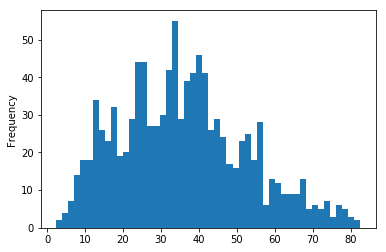

In [9]:
df.Strength.plot(kind='hist', bins=50)

[]

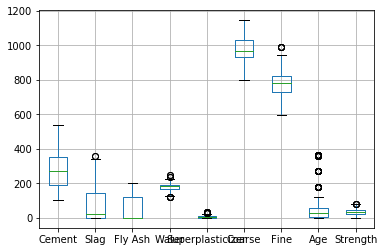

In [10]:
df.boxplot(return_type='dict')
plt.plot()

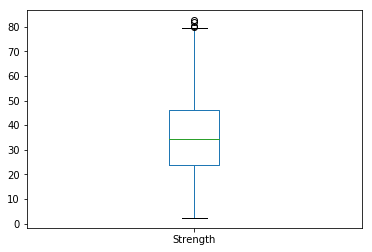

In [11]:
df.Strength.plot(kind='box')

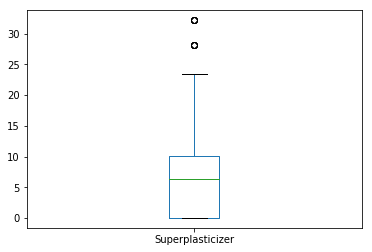

In [12]:
df.Superplasticizer.plot(kind='box')

In [13]:
target ='Strength'
features = set(df.columns)-set([target])

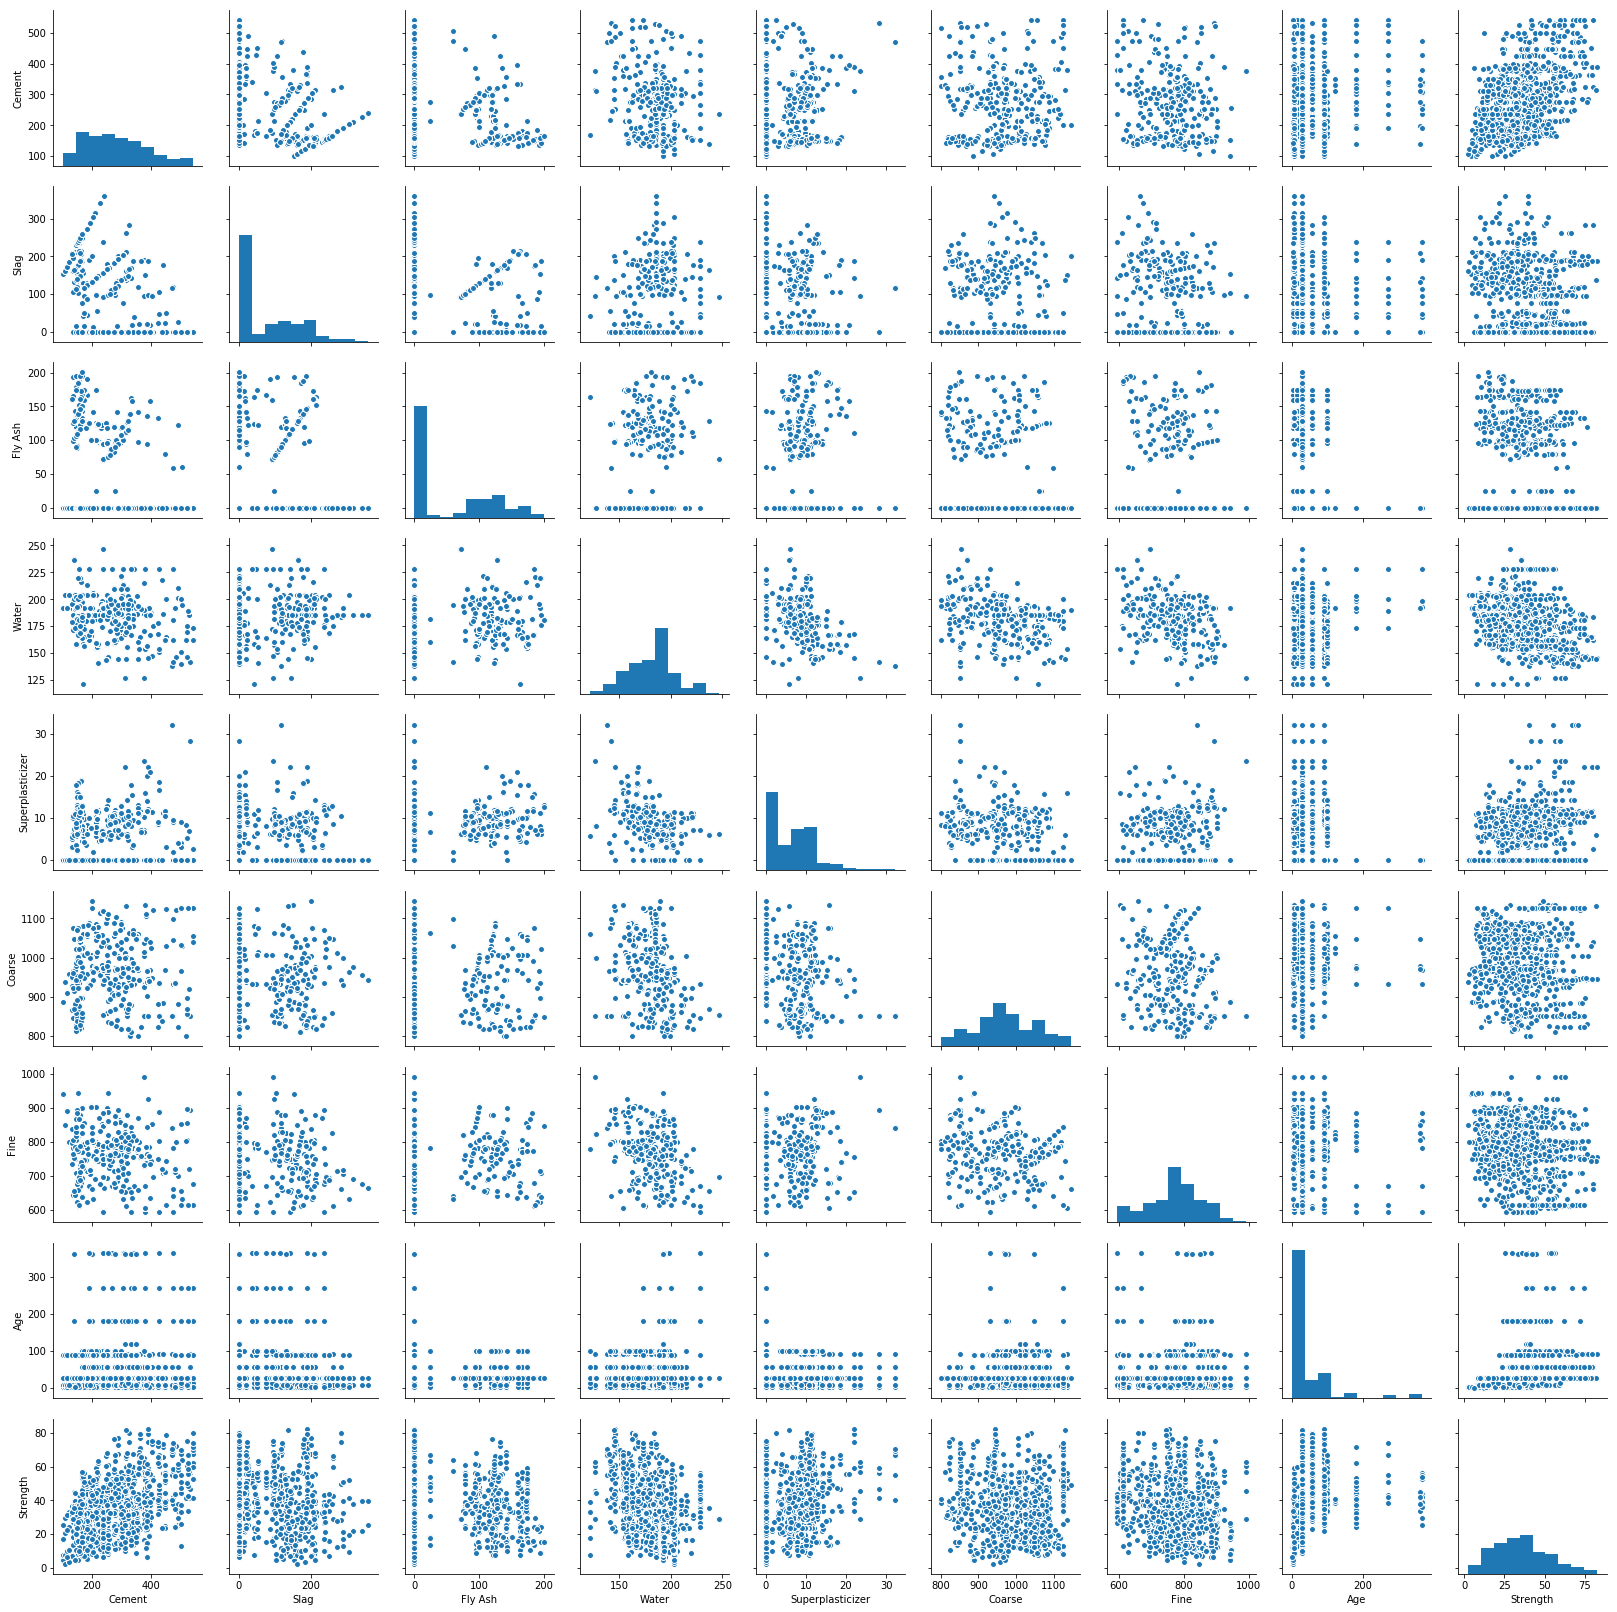

In [14]:
import seaborn as sb
sb.pairplot(df)

In [15]:
df.Strength[df.Strength>80]

153    80.199848
181    82.599225
381    81.751169
Name: Strength, dtype: float64

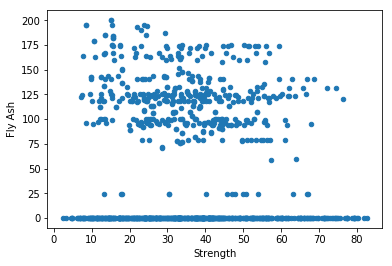

In [16]:
df.plot(kind='Scatter', x='Strength', y='Fly Ash')

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.loc[:,features])
x_f = scaler.transform(df.loc[:,features])

In [18]:
x_train_f, x_test_f, y_train, y_test = train_test_split(x_f, df.loc[:, target], test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train_f, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [20]:
regressor.score(x_test_f, y_test)

0.87001460119050034

In [21]:
y_predict = regressor.predict(x_test_f)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_predict)

0.87001460119050034

In [22]:
mean_squared_error(y_test, y_predict)

35.313010040234587